### N-gram language models or how to write scientific papers (4 pts)

We shall train our language model on a corpora of [ArXiv](http://arxiv.org/) articles and see if we can generate a new one!

![img](https://media.npr.org/assets/img/2013/12/10/istock-18586699-monkey-computer_brick-16e5064d3378a14e0e4c2da08857efe03c04695e-s800-c85.jpg)

_data by neelshah18 from [here](https://www.kaggle.com/neelshah18/arxivdataset/)_

_Disclaimer: this has nothing to do with actual science. But it's fun, so who cares?!_

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
# Alternative manual download link: https://yadi.sk/d/_nGyU2IajjR9-w
!wget "https://www.dropbox.com/s/99az9n1b57qkd9j/arxivData.json.tar.gz?dl=1" -O arxivData.json.tar.gz
!tar -xvzf arxivData.json.tar.gz
data = pd.read_json("./arxivData.json")
data.sample(n=5)

--2023-10-14 16:54:46--  https://www.dropbox.com/s/99az9n1b57qkd9j/arxivData.json.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6028:18::a27d:4712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/99az9n1b57qkd9j/arxivData.json.tar.gz [following]
--2023-10-14 16:54:46--  https://www.dropbox.com/s/dl/99az9n1b57qkd9j/arxivData.json.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9b0f59628c8f966a7197dcc6fe.dl.dropboxusercontent.com/cd/0/get/CFkZ8YSpKu_OXUIcmMa358tTZ0IYk-0UusxYHNGJf6IsQhie_ljIOwVPItzVERgoGTesndW0xobSUiRjtlLNILSi852ym3cugnpVwYXPP0YDHA3w0QDSi9kvi_mgyGfjiNw/file?dl=1# [following]
--2023-10-14 16:54:47--  https://uc9b0f59628c8f966a7197dcc6fe.dl.dropboxusercontent.com/cd/0/get/CFkZ8YSpKu_OXUIcmMa358tTZ0IYk-0UusxYHNGJf6IsQhie_ljIOwVPItzVERgoGTesndW0xobSUiRjtlLNILSi852

,author,day,id,link,month,summary,tag,title,year
38257,"[{'name': 'Peter K. Bol'}, {'name': 'Chao-Lin ...",8,1504.02148v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",4,We present results of expanding the contents o...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Mining and discovering biographical informatio...,2015
12579,"[{'name': 'Mohammad Sadegh Talebi'}, {'name': ...",5,1803.01626v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,The problem of reinforcement learning in an un...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Variance-Aware Regret Bounds for Undiscounted ...,2018
9044,[{'name': 'Sajilal Divakaran'}],8,1205.1639v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,The success rates of Optical Character Recogni...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Spectral Analysis of Projection Histogram for ...,2012
14097,"[{'name': 'Yinyan Zhang'}, {'name': 'Shuai Li'}]",28,1709.09840v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,Bio-inspired algorithms have received a signif...,"[{'term': 'cs.NE', 'scheme': 'http://arxiv.org...",PSA: A novel optimization algorithm based on s...,2017
36459,"[{'name': 'Léon R. Planken'}, {'name': 'Mathij...",18,1401.4609v1,"[{'rel': 'related', 'href': 'http://dx.doi.org...",1,We present two new and efficient algorithms fo...,"[{'term': 'cs.DS', 'scheme': 'http://arxiv.org...",Computing All-Pairs Shortest Paths by Leveragi...,2014


In [104]:
data.sample(5)

,author,day,id,link,month,summary,tag,title,year
29032,"[{'name': 'Qi Jia'}, {'name': 'Meiyu Yu'}, {'n...",9,1708.02716v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",8,Recognizing freehand sketches with high arbitr...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Sequential Dual Deep Learning with Shape and T...,2017
3387,"[{'name': 'Elad Richardson'}, {'name': 'Rom He...",2,1609.00629v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,"We present SEBOOST, a technique for boosting t...","[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",SEBOOST - Boosting Stochastic Learning Using S...,2016
9482,"[{'name': 'Brendan Jou'}, {'name': 'Shih-Fu Ch...",5,1604.01335v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",4,Residual learning has recently surfaced as an ...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Deep Cross Residual Learning for Multitask Vis...,2016
16326,"[{'name': 'Edison Marrese-Taylor'}, {'name': '...",6,1701.01565v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",1,Reproducing experiments is an important instru...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Replication issues in syntax-based aspect extr...,2017
36948,"[{'name': 'Diederik Aerts'}, {'name': 'Massimi...",2,1512.00880v1,"[{'rel': 'related', 'href': 'http://dx.doi.org...",12,We present a very general geometrico-dynamical...,"[{'term': 'quant-ph', 'scheme': 'http://arxiv....",The GTR-model: a universal framework for quant...,2015


In [105]:
# assemble lines: concatenate title and description
lines = data.apply(lambda row: row['title'] + ' ; ' + row['summary'].replace("\n", ' '), axis=1).tolist()

sorted(lines, key=len)[:3]

['Differential Contrastive Divergence ; This paper has been retracted.',
 'What Does Artificial Life Tell Us About Death? ; Short philosophical essay',
 'P=NP ; We claim to resolve the P=?NP problem via a formal argument for P=NP.']

### Tokenization

You know the dril. The data is messy. Go clean the data. Use WordPunctTokenizer or something.


In [106]:
# Task: convert lines (in-place) into strings of space-separated tokens. Import & use WordPunctTokenizer

from nltk import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
lines = [' '.join(tokenizer.tokenize(s)).lower() for s in lines]

In [107]:
assert sorted(lines, key=len)[0] == \
    'differential contrastive divergence ; this paper has been retracted .'
assert sorted(lines, key=len)[2] == \
    'p = np ; we claim to resolve the p =? np problem via a formal argument for p = np .'

### N-Gram Language Model (1point)

A language model is a probabilistic model that estimates text probability: the joint probability of all tokens $w_t$ in text $X$: $P(X) = P(w_1, \dots, w_T)$.

It can do so by following the chain rule:
$$P(w_1, \dots, w_T) = P(w_1)P(w_2 \mid w_1)\dots P(w_T \mid w_1, \dots, w_{T-1}).$$ 

The problem with such approach is that the final term $P(w_T \mid w_1, \dots, w_{T-1})$ depends on $n-1$ previous words. This probability is impractical to estimate for long texts, e.g. $T = 1000$.

One popular approximation is to assume that next word only depends on a finite amount of previous words:

$$P(w_t \mid w_1, \dots, w_{t - 1}) = P(w_t \mid w_{t - n + 1}, \dots, w_{t - 1})$$

Such model is called __n-gram language model__ where n is a parameter. For example, in 3-gram language model, each word only depends on 2 previous words. 

$$
    P(w_1, \dots, w_n) = \prod_t P(w_t \mid w_{t - n + 1}, \dots, w_{t - 1}).
$$

You can also sometimes see such approximation under the name of _n-th order markov assumption_.

The first stage to building such a model is counting all word occurences given N-1 previous words

In [108]:
from tqdm import tqdm
from collections import defaultdict, Counter

# special tokens: 
# - `UNK` represents absent tokens, 
# - `EOS` is a special token after the end of sequence

UNK, EOS = "_UNK_", "_EOS_"

def count_ngrams(lines, n):
    """
    Count how many times each word occured after (n - 1) previous words
    :param lines: an iterable of strings with space-separated tokens
    :returns: a dictionary { tuple(prefix_tokens): {next_token_1: count_1, next_token_2: count_2}}

    When building counts, please consider the following two edge cases:
    - if prefix is shorter than (n - 1) tokens, it should be padded with UNK. For n=3,
      empty prefix: "" -> (UNK, UNK)
      short prefix: "the" -> (UNK, the)
      long prefix: "the new approach" -> (new, approach)
    - you should add a special token, EOS, at the end of each sequence
      "... with deep neural networks ." -> (..., with, deep, neural, networks, ., EOS)
      count the probability of this token just like all others.
    """
    counts = defaultdict(Counter)
    
    # counts[(word1, word2)][word3] = how many times word3 occured after (word1, word2)
    context_len = n - 1
    for line in lines:
        tokens = line.split()
        tokens.append(EOS)
        for i, token in enumerate(tokens):
            is_unk_needed = i < context_len
            unk_cnt = context_len - i
            context = [UNK] * is_unk_needed * unk_cnt + tokens[unk_cnt * (is_unk_needed - 1) : i] 
            counts[tuple(context)][token] += 1
    
    return counts

In [109]:
%%timeit
dummy_lines = sorted(lines, key=len)[:1000]
dummy_counts = count_ngrams(dummy_lines, n=3)

96.7 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [110]:
%%timeit
dummy_lines = sorted(lines, key=len)[:1000]
dummy_counts = count_ngrams(dummy_lines, n=3)

95.3 ms ± 3.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [111]:
dummy_lines = sorted(lines, key=len)[:1000]
dummy_counts = count_ngrams(dummy_lines, n=1)

In [112]:
# let's test it
dummy_lines = sorted(lines, key=len)[:100]
dummy_counts = count_ngrams(dummy_lines, n=3)
assert set(map(len, dummy_counts.keys())) == {2}, "please only count {n-1}-grams"
assert len(dummy_counts[('_UNK_', '_UNK_')]) == 78
assert dummy_counts['_UNK_', 'a']['note'] == 3
assert dummy_counts['p', '=']['np'] == 2
assert dummy_counts['author', '.']['_EOS_'] == 1

Once we can count N-grams, we can build a probabilistic language model.
The simplest way to compute probabilities is in proporiton to counts:

$$ P(w_t | prefix) = { Count(prefix, w_t) \over \sum_{\hat w} Count(prefix, \hat w) } $$

In [113]:
class NGramLanguageModel:    
    def __init__(self, lines, n):
        """ 
        Train a simple count-based language model: 
        compute probabilities P(w_t | prefix) given ngram counts
        
        :param n: computes probability of next token given (n - 1) previous words
        :param lines: an iterable of strings with space-separated tokens
        """
        assert n >= 1
        self.n = n
    
        counts = count_ngrams(lines, self.n)
        
        # compute token proabilities given counts
        self.probs = defaultdict(Counter)
        # probs[(word1, word2)][word3] = P(word3 | word1, word2)
        for prefix, counter in counts.items():
            total_cnt = counter.total()
            self.probs[prefix].update({word:  cnt / total_cnt for word, cnt in counter.items()})
            
        # populate self.probs with actual probabilities
        
            
    def get_possible_next_tokens(self, prefix):
        """
        :param prefix: string with space-separated prefix tokens
        :returns: a dictionary {token : it's probability} for all tokens with positive probabilities
        """
        prefix = prefix.split()
        prefix = prefix[max(0, len(prefix) - self.n + 1):]
        prefix = [ UNK ] * (self.n - 1 - len(prefix)) + prefix
        return self.probs[tuple(prefix)]
    
    def get_next_token_prob(self, prefix, next_token):
        """
        :param prefix: string with space-separated prefix tokens
        :param next_token: the next token to predict probability for
        :returns: P(next_token|prefix) a single number, 0 <= P <= 1
        """
        return self.get_possible_next_tokens(prefix).get(next_token, 0)

Let's test it!

In [114]:
dummy_lm = NGramLanguageModel(dummy_lines, n=3)

p_initial = dummy_lm.get_possible_next_tokens('') # '' -> ['_UNK_', '_UNK_']
assert np.allclose(p_initial['learning'], 0.02)
assert np.allclose(p_initial['a'], 0.13)
assert np.allclose(p_initial.get('meow', 0), 0)
assert np.allclose(sum(p_initial.values()), 1)

p_a = dummy_lm.get_possible_next_tokens('a') # '' -> ['_UNK_', 'a']
assert np.allclose(p_a['machine'], 0.15384615)
assert np.allclose(p_a['note'], 0.23076923)
assert np.allclose(p_a.get('the', 0), 0)
assert np.allclose(sum(p_a.values()), 1)

assert np.allclose(dummy_lm.get_possible_next_tokens('a note')['on'], 1)
assert dummy_lm.get_possible_next_tokens('a machine') == \
    dummy_lm.get_possible_next_tokens("there have always been ghosts in a machine"), \
    "your 3-gram model should only depend on 2 previous words"

Now that you've got a working n-gram language model, let's see what sequences it can generate. But first, let's train it on the whole dataset.

In [115]:
lm = NGramLanguageModel(lines, n=3)

The process of generating sequences is... well, it's sequential. You maintain a list of tokens and iteratively add next token by sampling with probabilities.

$ X = [] $

__forever:__
* $w_{next} \sim P(w_{next} | X)$
* $X = concat(X, w_{next})$


Instead of sampling with probabilities, one can also try always taking most likely token, sampling among top-K most likely tokens or sampling with temperature. In the latter case (temperature), one samples from

$$w_{next} \sim {P(w_{next} | X) ^ {1 / \tau} \over \sum_{\hat w} P(\hat w | X) ^ {1 / \tau}}$$

Where $\tau > 0$ is model temperature. If $\tau << 1$, more likely tokens will be sampled with even higher probability while less likely tokens will vanish.

In [116]:
def get_next_token(lm, prefix, temperature=1.0):
    """
    return next token after prefix;
    :param temperature: samples proportionally to lm probabilities ^ (1 / temperature)
        if temperature == 0, always takes most likely token. Break ties arbitrarily.
    """
    tokens, probs = zip(*lm.get_possible_next_tokens(prefix).items())
    if not temperature:
        return tokens[np.argmax(probs)]
    deg = 1 / temperature
    s = sum([p ** deg for p in probs])
    new_probs = [p ** deg / s for p in probs]
    idx = np.random.choice(range(len(tokens)), p=new_probs)
    return tokens[idx]

In [117]:
from collections import Counter
test_freqs = Counter([get_next_token(lm, 'there have') for _ in range(10000)])
assert 250 < test_freqs['not'] < 450
assert 8500 < test_freqs['been'] < 9500
assert 1 < test_freqs['lately'] < 200

test_freqs = Counter([get_next_token(lm, 'deep', temperature=1.0) for _ in range(10000)])
assert 1500 < test_freqs['learning'] < 3000
test_freqs = Counter([get_next_token(lm, 'deep', temperature=0.5) for _ in range(10000)])
assert 8000 < test_freqs['learning'] < 9000
test_freqs = Counter([get_next_token(lm, 'deep', temperature=0.0) for _ in range(10000)])
assert test_freqs['learning'] == 10000

print("Looks nice!")

Looks nice!


Let's have fun with this model

In [118]:
prefix = 'artificial' # <- your ideas :)

for i in range(100):
    prefix += ' ' + get_next_token(lm, prefix)
    if prefix.endswith(EOS) or len(lm.get_possible_next_tokens(prefix)) == 0:
        break
        
print(prefix)

artificial mutation inspired hyper - parameter search , an augmented reality ( ar ) applications . word embeddings . experimental results demonstrate that our method is known that speaker verification ; there is no standard and may , however few theoretical guarantees showing how the " sp - aen can transfer knowledge gained through the literature . i relate the methods on both synthetic and real - time frame rates ". these techniques enable rl agents can assist decision - maker , uta disaggregation procedures use the imagenet recognition challenge datasets such as tensor completion problem . this is what happens


In [119]:
prefix = 'and' # <- more of your ideas

for i in range(100):
    prefix += ' ' + get_next_token(lm, prefix, temperature=0.5)
    if prefix.endswith(EOS) or len(lm.get_possible_next_tokens(prefix)) == 0:
        break
        
print(prefix)

and the proposed method is proposed to obtain a tractable inference , and the other hand , we present a novel approach to the best of our knowledge , the proposed approach is based on the two approaches , we propose a novel approach for the first time , and the experiment has been widely used in the literature . in this paper , we propose a novel multi - agent systems . _EOS_


__More in the homework:__ nucleus sampling, top-k sampling, beam search(not for the faint of heart).

### Evaluating language models: perplexity (1point)

Perplexity is a measure of how well your model approximates the true probability distribution behind the data. __Smaller perplexity = better model__.

To compute perplexity on one sentence, use:
$$
    {\mathbb{P}}(w_1 \dots w_N) = P(w_1, \dots, w_N)^{-\frac1N} = \left( \prod_t P(w_t \mid w_{t - n}, \dots, w_{t - 1})\right)^{-\frac1N},
$$


On the corpora level, perplexity is a product of probabilities of all tokens in all sentences to the power of $1/N$, where $N$ is __total length (in tokens) of all sentences__ in corpora.

This number can quickly get too small for float32/float64 precision, so we recommend you to first compute log-perplexity (from log-probabilities) and then take the exponent.

In [120]:
def perplexity(lm, lines, min_logprob=np.log(10 ** -50.)):
    """
    :param lines: a list of strings with space-separated tokens
    :param min_logprob: if log(P(w | ...)) is smaller than min_logprop, set it equal to min_logrob
    :returns: corpora-level perplexity - a single scalar number from the formula above
    
    Note: do not forget to compute P(w_first | empty) and P(eos | full_sequence)
    
    PLEASE USE lm.get_next_token_prob and NOT lm.get_possible_next_tokens
    """
    p = 0.
    N = 0
    for line in lines:
        tokens = line.split()
        N += len(tokens) + 1
        prefix = UNK
        for token in tokens:
            p += max(np.log2(lm.get_next_token_prob(prefix, token)), min_logprob)
            prefix += ' ' + token
        p += max(np.log2(lm.get_next_token_prob(prefix, EOS)), min_logprob)
    
    return 2 ** ((-1 / N) * p)


In [121]:
lm1 = NGramLanguageModel(dummy_lines, n=1)
lm3 = NGramLanguageModel(dummy_lines, n=3)
lm10 = NGramLanguageModel(dummy_lines, n=10)

ppx1 = perplexity(lm1, dummy_lines)
ppx3 = perplexity(lm3, dummy_lines)
ppx10 = perplexity(lm10, dummy_lines)
ppx_missing = perplexity(lm3, ['the jabberwock , with eyes of flame , '])  # thanks, L. Carrol

print("Perplexities: ppx1=%.3f ppx3=%.3f ppx10=%.3f" % (ppx1, ppx3, ppx10))

assert all(0 < ppx < 500 for ppx in (ppx1, ppx3, ppx10)), "perplexity should be non-negative and reasonably small"
assert ppx1 > ppx3 > ppx10, "higher N models should overfit and "
assert np.isfinite(ppx_missing) and ppx_missing > 10 ** 6, "missing words should have large but finite perplexity. " \
    " Make sure you use min_logprob right"
assert np.allclose([ppx1, ppx3, ppx10], (318.2132342216302, 1.5199996213739575, 1.1838145037901249))

Perplexities: ppx1=318.213 ppx3=1.520 ppx10=1.184


/tmp/ipykernel_8318/3883729052.py:18: RuntimeWarning: divide by zero encountered in log2
  p += max(np.log2(lm.get_next_token_prob(prefix, token)), min_logprob)
/tmp/ipykernel_8318/3883729052.py:20: RuntimeWarning: divide by zero encountered in log2
  p += max(np.log2(lm.get_next_token_prob(prefix, EOS)), min_logprob)


Now let's measure the actual perplexity: we'll split the data into train and test and score model on test data only.

In [122]:
from sklearn.model_selection import train_test_split
train_lines, test_lines = train_test_split(lines, test_size=0.25, random_state=42)

for n in (1, 2, 3):
    lm = NGramLanguageModel(n=n, lines=train_lines)
    ppx = perplexity(lm, test_lines)
    print("N = %i, Perplexity = %.5f" % (n, ppx))
    

/tmp/ipykernel_8318/3883729052.py:18: RuntimeWarning: divide by zero encountered in log2
  p += max(np.log2(lm.get_next_token_prob(prefix, token)), min_logprob)


N = 1, Perplexity = 1420.16826


/tmp/ipykernel_8318/3883729052.py:20: RuntimeWarning: divide by zero encountered in log2
  p += max(np.log2(lm.get_next_token_prob(prefix, EOS)), min_logprob)


N = 2, Perplexity = 1031431.04445
N = 3, Perplexity = 10119238009390706.00000


In [123]:
# whoops, it just blew up :)

### LM Smoothing

The problem with our simple language model is that whenever it encounters an n-gram it has never seen before, it assigns it with the probabilitiy of 0. Every time this happens, perplexity explodes.

To battle this issue, there's a technique called __smoothing__. The core idea is to modify counts in a way that prevents probabilities from getting too low. The simplest algorithm here is Additive smoothing (aka [Lapace smoothing](https://en.wikipedia.org/wiki/Additive_smoothing)):

$$ P(w_t | prefix) = { Count(prefix, w_t) + \delta \over \sum_{\hat w} (Count(prefix, \hat w) + \delta) } $$

If counts for a given prefix are low, additive smoothing will adjust probabilities to a more uniform distribution. Not that the summation in the denominator goes over _all words in the vocabulary_.

Here's an example code we've implemented for you:

In [124]:
class LaplaceLanguageModel(NGramLanguageModel): 
    """ this code is an example, no need to change anything """
    def __init__(self, lines, n, delta=1.0):
        self.n = n
        counts = count_ngrams(lines, self.n)
        self.vocab = set(token for token_counts in counts.values() for token in token_counts)
        self.probs = defaultdict(Counter)

        for prefix in counts:
            token_counts = counts[prefix]
            total_count = sum(token_counts.values()) + delta * len(self.vocab)
            self.probs[prefix] = {token: (token_counts[token] + delta) / total_count
                                          for token in token_counts}
    def get_possible_next_tokens(self, prefix):
        token_probs = super().get_possible_next_tokens(prefix)
        missing_prob_total = 1.0 - sum(token_probs.values())
        missing_prob = missing_prob_total / max(1, len(self.vocab) - len(token_probs))
        return {token: token_probs.get(token, missing_prob) for token in self.vocab}
    
    def get_next_token_prob(self, prefix, next_token):
        token_probs = super().get_possible_next_tokens(prefix)
        if next_token in token_probs:
            return token_probs[next_token]
        else:
            missing_prob_total = 1.0 - sum(token_probs.values())
            missing_prob_total = max(0, missing_prob_total) # prevent rounding errors
            return missing_prob_total / max(1, len(self.vocab) - len(token_probs))
        

**Disclaimer**: the implementation above assumes all words unknown within a given context to be equally likely, *as well as the words outside of vocabulary*. Therefore, its' perplexity will be lower than it should when encountering such words. Therefore, comparing it with a model with fewer unknown words will not be fair. When implementing your own smoothing, you may handle this by adding a virtual `UNK` token of non-zero probability. Technically, this will result in a model where probabilities do not add up to $1$, but it is close enough for a practice excercise.

In [125]:
#test that it's a valid probability model
for n in (1, 2, 3):
    dummy_lm = LaplaceLanguageModel(dummy_lines, n=n)
    assert np.allclose(sum([dummy_lm.get_next_token_prob('a', w_i) for w_i in dummy_lm.vocab]), 1), "I told you not to break anything! :)"

In [126]:
for n in (1, 2, 3):
    lm = LaplaceLanguageModel(train_lines, n=n, delta=0.1)
    ppx = perplexity(lm, test_lines)
    print("N = %i, Perplexity = %.5f" % (n, ppx))

N = 1, Perplexity = 977.67559
N = 2, Perplexity = 470.48021
N = 3, Perplexity = 3679.44765


In [127]:
# optional: try to sample tokens from such a model

### Kneser-Ney smoothing (2 points)

Additive smoothing is simple, reasonably good but definitely not a State of The Art algorithm.


Your final task in this notebook is to implement [Kneser-Ney](https://en.wikipedia.org/wiki/Kneser%E2%80%93Ney_smoothing) smoothing.

It can be computed recurrently, for n>1:

$$P_{kn}(w_t | prefix_{n-1}) = { \max(0, Count(prefix_{n-1}, w_t) - \delta) \over \sum_{\hat w} Count(prefix_{n-1}, \hat w)} + \lambda_{prefix_{n-1}} \cdot P_{kn}(w_t | prefix_{n-2})$$

where
- $prefix_{n-1}$ is a tuple of {n-1} previous tokens
- $lambda_{prefix_{n-1}}$ is a normalization constant chosen so that probabilities add up to 1
- Unigram $P_{kn}(w_t | prefix_{n-2})$ corresponds to Kneser Ney smoothing for {N-1}-gram language model.
- Unigram $P_{kn}(w_t)$ is a special case: how likely it is to see x_t in an unfamiliar context

See lecture slides or wiki for more detailed formulae.

__Your task__ is to
- implement `KneserNeyLanguageModel` class,
- test it on 1-3 gram language models
- find optimal (within reason) smoothing delta for 3-gram language model with Kneser-Ney smoothing

In [128]:
class KneserNeyLanguageModel(NGramLanguageModel): 
    """ A template for Kneser-Ney language model. Default delta may be suboptimal. """
    def __init__(self, lines, n, delta=1.0):
        self.n = n
        self.counts = dict()
        self.delta = delta
        for n in range(1, self.n + 1):
            self.counts[n] = count_ngrams(lines, n)
            
        self.vocab = set(token for token_counts in self.counts[self.n].values() for token in token_counts)
        self.probs = self.compute_probs(self.n)
        
    def compute_probs(self, n):
        if n == 1:
            probs = defaultdict(Counter)
            token_counts = self.counts[1][()]
            total_count = token_counts.total()
            lambda_ = self.delta * len(token_counts) / total_count

            probs[()] = {token: max(0, token_counts[token] - self.delta) / total_count
                + lambda_ / len(self.vocab)
                for token in token_counts}
        else:
            probs = self.compute_probs(n - 1)
            for prefix in self.counts[n]:
                token_counts = self.counts[n][prefix]
                total_count = token_counts.total()
                lambda_ = self.delta * len(token_counts) / total_count
                prev_probs = probs[prefix]
                add = {token: lambda_ * prev_probs[token] for token in token_counts}
                probs[prefix] = {token: max(0, token_counts[token] - self.delta) / total_count
                    + add[token] for token in token_counts}
            
        return probs
            
    def get_possible_next_tokens(self, prefix):
        token_probs = super().get_possible_next_tokens(prefix)
        missing_prob_total = 1.0 - sum(token_probs.values())
        missing_prob = missing_prob_total / max(1, len(self.vocab) - len(token_probs))
        return {token: token_probs.get(token, missing_prob) for token in self.vocab}

        
    def get_next_token_prob(self, prefix, next_token):
        token_probs = super().get_possible_next_tokens(prefix)
        if next_token in token_probs:
            return token_probs[next_token]
        else:
            missing_prob_total = 1.0 - sum(token_probs.values())
            missing_prob_total = max(0, missing_prob_total)  # prevent rounding errors
            return missing_prob_total / max(1, len(self.vocab) - len(token_probs))

In [129]:
#test that it's a valid probability model
for n in (1, 2, 3):
    dummy_lm = KneserNeyLanguageModel(dummy_lines, n=n)
    assert np.allclose(sum([dummy_lm.get_next_token_prob('a', w_i) for w_i in dummy_lm.vocab]), 1), "I told you not to break anything! :)"

In [130]:
for n in (1, 2, 3):
    lm = KneserNeyLanguageModel(train_lines, n=n)
    ppx = perplexity(lm, test_lines)
    print("N = %i, Perplexity = %.5f" % (n, ppx))

/tmp/ipykernel_8318/3883729052.py:18: RuntimeWarning: divide by zero encountered in log2
  p += max(np.log2(lm.get_next_token_prob(prefix, token)), min_logprob)


N = 1, Perplexity = 1420.16826


/tmp/ipykernel_8318/3883729052.py:20: RuntimeWarning: divide by zero encountered in log2
  p += max(np.log2(lm.get_next_token_prob(prefix, EOS)), min_logprob)


N = 2, Perplexity = 5631.23169
N = 3, Perplexity = 836251.14695


In [131]:
deltas = (0.01, 0.25, 0.5, 0.75, 1)
deltas_ppx = {}

for delta in deltas:
    lm = KneserNeyLanguageModel(train_lines, n=3,delta=delta)
    deltas_ppx[delta] = perplexity(lm, test_lines)

/tmp/ipykernel_8318/3883729052.py:18: RuntimeWarning: divide by zero encountered in log2
  p += max(np.log2(lm.get_next_token_prob(prefix, token)), min_logprob)
/tmp/ipykernel_8318/3883729052.py:20: RuntimeWarning: divide by zero encountered in log2
  p += max(np.log2(lm.get_next_token_prob(prefix, EOS)), min_logprob)


Text(0.5, 0, 'delta')

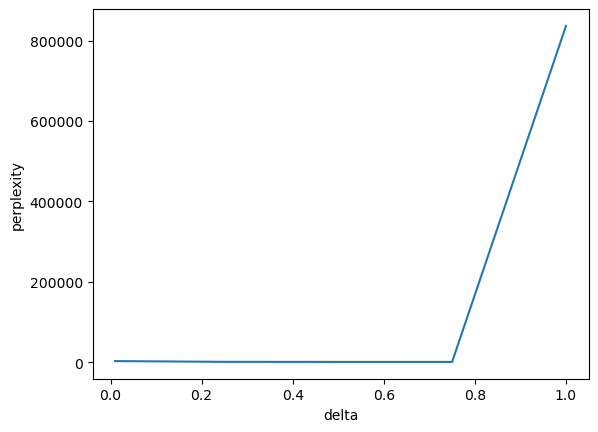

In [132]:
import matplotlib.pyplot as plt

plt.plot(deltas_ppx.keys(), deltas_ppx.values())
plt.ylabel("perplexity")
plt.xlabel("delta")